Title : Data Cleansing for APP Burearu

# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Memuat DataSets

In [2]:
df = pd.read_csv("C:/Users/ASUS/JupyterNotebookFile/RaHciFinaltask/bureau.csv") # load dataset dari direktori file laptop

In [3]:
df.head() #menampilkan 5 data teratas

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


# Exploratory Data Analysis (EDA)

Disini kita pakai **pd.set_option('display.max_columns', None)** untuk menunjukkan semua kolom yang terdapat pada dataset

In [4]:
pd.set_option('display.max_columns', None) #meanmpilkan semua kolom pada data
display(df.head(5)) # 5 data teratas menggunakan display agar tetap bisa ditampilkan, karena line berikutnya mengeksekusi perintah print
print(f'Ukuran dari dataset (baris, kolom) : {df.shape}')

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


Ukuran dari dataset (baris, kolom) : (1716428, 17)


## Tipe Data pada DataSet

In [5]:
df.info() #menampilkan tipe dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


Dari sini kita bisa tahu bahwa terdapat 65 kolom bertipe Float, tipe int ada 41 dan objet 16

Dari hal ini untuk menampilkan deskriptif statistiknya ada 2 janis, yaitu yang enampilkan untuk tipe numerik dan obej

### Deskriptif statistik Numerik

In [6]:
df.describe() #ini untuk numerical

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
count,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.610875e+06,1.082775e+06,5.919400e+05,1.716428e+06,1.716415e+06,1.458759e+06,1.124648e+06,1.716428e+06,1.716428e+06,4.896370e+05
mean,2.782149e+05,5.924434e+06,-1.142108e+03,8.181666e-01,5.105174e+02,-1.017437e+03,3.825418e+03,6.410406e-03,3.549946e+05,1.370851e+05,6.229515e+03,3.791276e+01,-5.937483e+02,1.571276e+04
std,1.029386e+05,5.322657e+05,7.951649e+02,3.654443e+01,4.994220e+03,7.140106e+02,2.060316e+05,9.622391e-02,1.149811e+06,6.774011e+05,4.503203e+04,5.937650e+03,7.207473e+02,3.258269e+05
min,1.000010e+05,5.000000e+06,-2.922000e+03,0.000000e+00,-4.206000e+04,-4.202300e+04,0.000000e+00,0.000000e+00,0.000000e+00,-4.705600e+06,-5.864061e+05,0.000000e+00,-4.194700e+04,0.000000e+00
25%,1.888668e+05,5.463954e+06,-1.666000e+03,0.000000e+00,-1.138000e+03,-1.489000e+03,0.000000e+00,0.000000e+00,5.130000e+04,0.000000e+00,0.000000e+00,0.000000e+00,-9.080000e+02,0.000000e+00
50%,2.780550e+05,5.926304e+06,-9.870000e+02,0.000000e+00,-3.300000e+02,-8.970000e+02,0.000000e+00,0.000000e+00,1.255185e+05,0.000000e+00,0.000000e+00,0.000000e+00,-3.950000e+02,0.000000e+00
75%,3.674260e+05,6.385681e+06,-4.740000e+02,0.000000e+00,4.740000e+02,-4.250000e+02,0.000000e+00,0.000000e+00,3.150000e+05,4.015350e+04,0.000000e+00,0.000000e+00,-3.300000e+01,1.350000e+04
max,4.562550e+05,6.843457e+06,0.000000e+00,2.792000e+03,3.119900e+04,0.000000e+00,1.159872e+08,9.000000e+00,5.850000e+08,1.701000e+08,4.705600e+06,3.756681e+06,3.720000e+02,1.184534e+08


### Deskriptif Statistik Kategorial

In [7]:
tipe_data_kategorial = df.select_dtypes(include='object') #memilih tipe data objek
tipe_data_kategorial.describe()

,CREDIT_ACTIVE,CREDIT_CURRENCY,CREDIT_TYPE
count,1716428,1716428,1716428
unique,4,4,15
top,Closed,currency 1,Consumer credit
freq,1079273,1715020,1251615


# Data Cleansing

## Mengecek Nilai Duplikasi

In [8]:
df.duplicated().sum() #mennjumlahkan data yang memiliki nilai duplikasi

0

Dari pengecekan nilai duplikasi diatas, menunjukkan bahawa tidak ada data yang duplikasi, Selanjutkan kita lanjutkan untuk pengecekan Missing Value

## Missing Value

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def pengecekan(data):
    pd.set_option('display.max_rows', None)
    missing_values = data.isna().sum()
    missing_columns = missing_values[missing_values > 0]
    if not missing_columns.empty:
        persentase = missing_columns / len(data) * 100
        print(f'Kolom dengan Missing Value :')
        missing_info = pd.DataFrame({'Missing Values': missing_columns, 'Persentase': persentase})
        missing_info = missing_info.sort_values(by='Missing Values', ascending=False)
        missing_info.info()
        
        # Visualisasi
        plt.figure(figsize=(12, 9))
        colors = []
        for persen in missing_info['Persentase']:
            if persen > 51:
                colors.append('#E1341E')  # Merah
            elif persen > 41:
                colors.append('#FFA500')  # Orange
            elif persen > 21:
                colors.append('#FFFF00')  # Kuning
            else:
                colors.append('#2CA02C')  # Hijau
        ax = sns.barplot(x='Persentase', y=missing_info.index, data=missing_info, palette=colors)

        for p in ax.patches:
            ax.annotate("%.2f" % p.get_width() + '%', xy=(p.get_width(), p.get_y()+p.get_height()/2),
                        xytext=(8, 0), textcoords='offset points', ha="left", va="center", fontsize=10)

        plt.title('Persentase Missing Value untuk Setiap Kolom', fontsize=10)
        plt.xlabel('Persentase Missing Value', fontsize=12)
        plt.ylabel('Nama_kolom', fontsize=12)
        
        # Menambahkan legenda
        legend_labels = ['> 51%', '31% - 51%', '21% - 31%', '< 21%']
        legend_colors = ['#E1341E', '#FFA500', '#FFFF00', '#2CA02C']
        patches = [plt.Rectangle((0,0),1,1,fc=color, edgecolor='none') for color in legend_colors]
        plt.legend(patches, legend_labels, loc='lower right')
        
        plt.tight_layout()
        plt.xlim(0, 100)
        plt.show()
        
    else:
        print("Tidak ada kolom dengan Missing Value.")

Kolom dengan Missing Value :
<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, AMT_ANNUITY to AMT_CREDIT_SUM
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Missing Values  7 non-null      int64  
 1   Persentase      7 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 168.0+ bytes


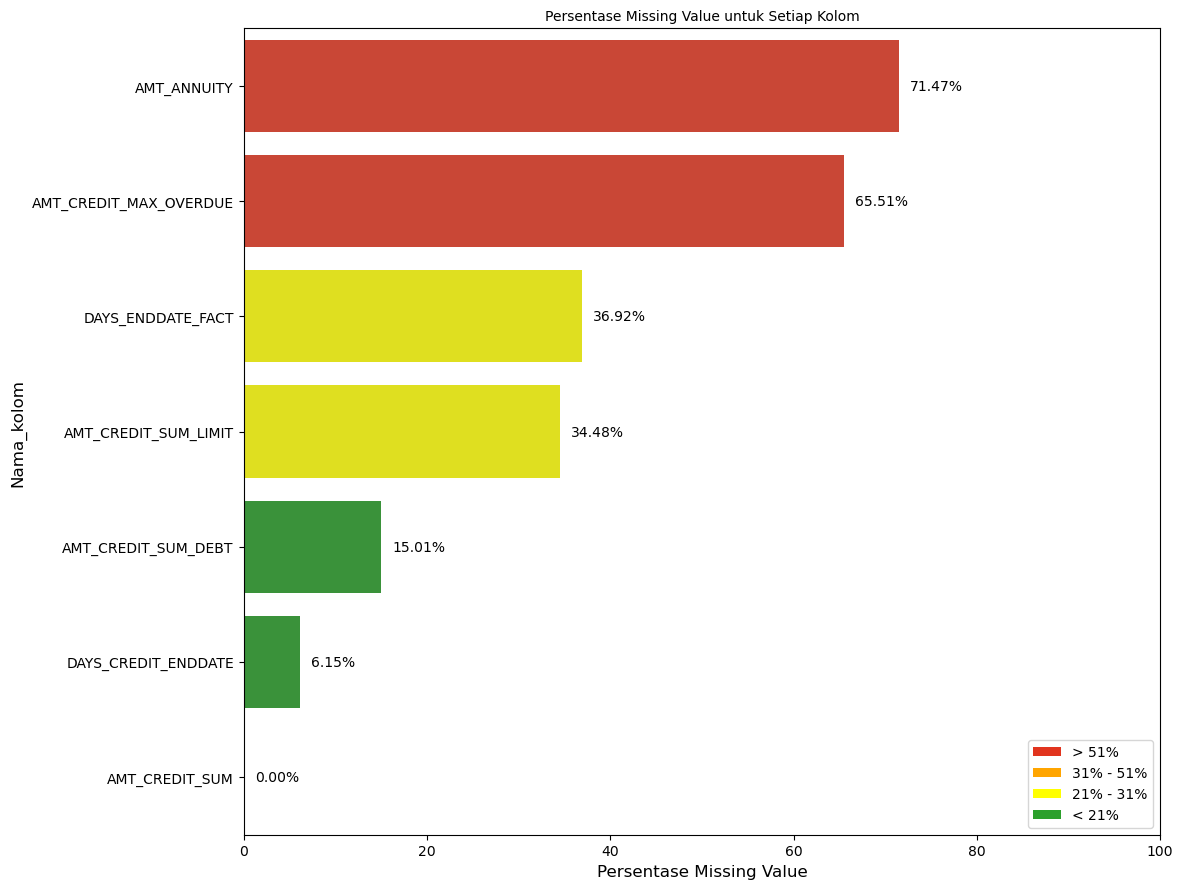

In [10]:
pengecekan(df)

Hasil diatas menunjukkan bahwa, hampir dari separuh data memiliki nilai hilang yang melebihi 50%. Untuk keputusan saya ini, saya mengamil tindakan untuk mengapus kolom yang memliki nilai missing value diatas 45%. Karena jika kita isi dengan nilai 0 atau mean, kemungkinan besar hasilnya akan tidak akurat dan bisa bikin data jadi kelihatan janggal

# Menghapus Kolom Diatas 45%

In [12]:
# Menghitung persentase missing value untuk setiap kolom
persentase_missing = (df.isnull().sum() / len(df)) * 100

# Membuat list nama kolom yang akan dihapus
kolom_hapus = persentase_missing[persentase_missing > 45].index.tolist()

# Menghapus kolom dari dataset
data_bureau_clean = df.drop(columns=kolom_hapus)

In [13]:
data_bureau_clean.shape

(1716428, 15)

In [14]:
data_bureau_clean.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,0,91323.0,0.0,NaN,0.0,Consumer credit,-131
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21


# Mengisi Missing Value 

Kolom dengan Missing Value :
<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, DAYS_ENDDATE_FACT to AMT_CREDIT_SUM
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Missing Values  5 non-null      int64  
 1   Persentase      5 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 120.0+ bytes


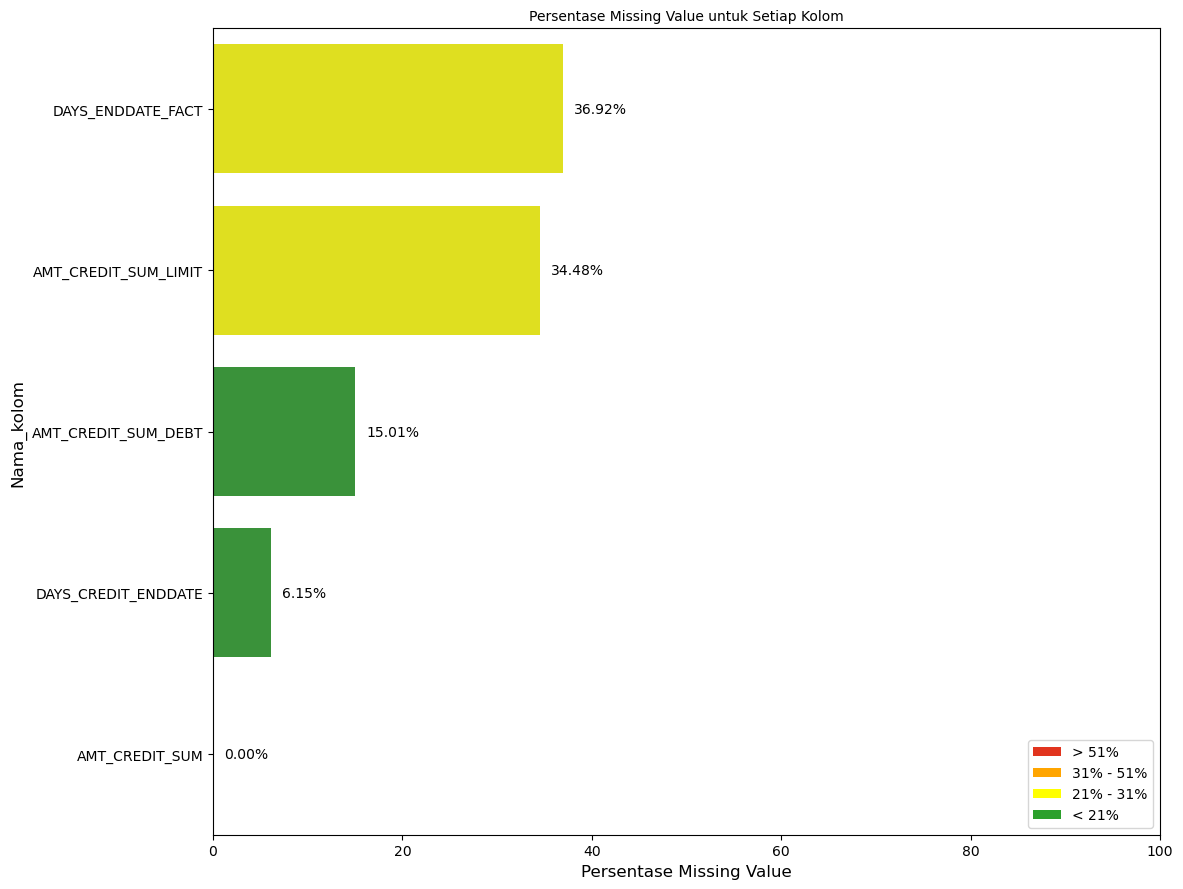

In [15]:
pengecekan(data_bureau_clean)

In [16]:
def isi_missing_value(data):
    # Mengisi nilai missing value untuk kolom numerik dengan rata-rata
    for kolom in data.select_dtypes(include='number').columns:
        mean_value = data[kolom].mean()
        data[kolom].fillna(mean_value, inplace=True)

    # Mengisi nilai missing value untuk kolom objek dengan mode
    for kolom in data.select_dtypes(include='object').columns:
        mode_value = data[kolom].mode()[0]
        data[kolom].fillna(mode_value, inplace=True)

    return data

# Contoh penggunaan:
data_clean = isi_missing_value(data_bureau_clean)

In [17]:
data_clean.shape

(1716428, 15)

In [16]:
pengecekan(data_clean)

Tidak ada kolom dengan Missing Value.


# Menyimpan Data

In [18]:
data_clean.to_csv('data_clean_bureau.csv', index=False)